<a href="https://colab.research.google.com/github/lamini-H/ML_Projects/blob/main/Malware_detection_using_memory_dumps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# We develope a machine learning model that classifies whether a memory dump is infected with virus or not. This task is divided into two. First, we perform a binary classification (whether a file is begning or malignant) and then perform a multiclass classification, to which class of virus does a file belongs to in the case it is malignant.


# Binary classification

In [ ]:
# Import needed modules for random forrest, confusion matrix and splitting the data
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, zero_one_loss,roc_auc_score, classification_report, accuracy_score, RocCurveDisplay, precision_recall_curve, average_precision_score, PrecisionRecallDisplay, roc_curve, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize,LabelEncoder,MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from time import process_time
import psutil
import os


In [ ]:


def print_memory_usage():
    process = psutil.Process(os.getpid())
    print(f"Memory Usage: {process.memory_info().rss / (1024 * 1024):.2f} MB")  # RSS in MB


In [ ]:
# Based on the columns extracted in the volatility, we define a function which takes a data and returns the data with the extracted columns

data=pd.read_csv('New_Obsfuscated.csv')
# output=pd.read_csv('output.csv')

def feature_selection(data):
    columns_extracted=['callbacks.ncallbacks',
 'dlllist.ndlls',
 'ldrmodules.not_in_init',
 'ldrmodules.not_in_init_avg',
 'ldrmodules.not_in_load',
 'ldrmodules.not_in_load_avg',
 'ldrmodules.not_in_mem',
 'ldrmodules.not_in_mem_avg',
 'malfind.commitCharge',
 'malfind.ninjections',
 'malfind.protection',
 'malfind.uniqueInjections',
 'modules.nmodules',
 'pslist.avg_handlers',
 'pslist.avg_threads',
 'pslist.nppid',
 'pslist.nproc',
 'pslist.nprocs64bit']
    return data[columns_extracted]

extracted_data=feature_selection(data)


extracted_data


,callbacks.ncallbacks,dlllist.ndlls,ldrmodules.not_in_init,ldrmodules.not_in_init_avg,ldrmodules.not_in_load,ldrmodules.not_in_load_avg,ldrmodules.not_in_mem,ldrmodules.not_in_mem_avg,malfind.commitCharge,malfind.ninjections,malfind.protection,malfind.uniqueInjections,modules.nmodules,pslist.avg_handlers,pslist.avg_threads,pslist.nppid,pslist.nproc,pslist.nprocs64bit
0,87,1694,95,0.054441,53,0.030372,53,0.030372,21,5,30,1.250000,138,202.844444,10.555556,17,45,0
1,87,2074,123,0.057774,77,0.036167,77,0.036167,77,12,72,1.714286,138,242.234043,11.531915,19,47,0
2,88,1932,89,0.045571,51,0.026114,51,0.026114,6,5,30,1.250000,137,288.225000,14.725000,14,40,0
3,88,1445,62,0.042966,31,0.021483,31,0.021483,2,2,12,1.000000,138,264.281250,13.500000,13,32,0
4,87,2067,143,0.067042,102,0.047820,102,0.047820,77,12,72,2.000000,138,281.333333,11.452381,16,42,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58591,86,1453,79,0.053815,43,0.029292,43,0.029292,3,3,18,1.000000,138,215.486487,10.108108,15,37,0
58592,88,1347,79,0.056875,43,0.030958,43,0.030958,3,3,18,1.000000,138,190.216216,9.945946,14,37,0
58593,88,1448,79,0.053815,43,0.029292,43,0.029292,3,3,18,1.000000,138,210.026316,9.842105,15,38,0
58594,87,1452,79,0.053999,43,0.029392,43,0.029392,3,3,18,1.000000,138,215.513513,10.243243,15,37,0


In [ ]:
#Statistics of the data

extracted_data.describe()

,callbacks.ncallbacks,dlllist.ndlls,ldrmodules.not_in_init,ldrmodules.not_in_init_avg,ldrmodules.not_in_load,ldrmodules.not_in_load_avg,ldrmodules.not_in_mem,ldrmodules.not_in_mem_avg,malfind.commitCharge,malfind.ninjections,malfind.protection,malfind.uniqueInjections,modules.nmodules,pslist.avg_handlers,pslist.avg_threads,pslist.nppid,pslist.nproc,pslist.nprocs64bit
count,58596.000000,58596.000000,58596.000000,58596.000000,58596.000000,58596.000000,58596.000000,58596.000000,58596.000000,58596.000000,58596.000000,58596.000000,58596.000000,58596.000000,58596.000000,58596.000000,58596.000000,58596.0
mean,86.905659,1810.805447,99.946413,0.055223,60.830347,0.033170,60.832599,0.033171,969.199229,7.010274,42.282408,1.733699,137.961465,247.509819,11.341655,14.713837,41.394771,0.0
std,3.134117,329.782639,21.438482,0.010112,18.761422,0.009263,18.759947,0.009266,6041.620916,15.390647,92.337061,2.741343,0.198251,111.857790,1.588231,2.656748,5.777249,0.0
min,50.000000,670.000000,16.000000,0.040526,6.000000,0.016176,6.000000,0.016176,1.000000,1.000000,6.000000,1.000000,126.000000,34.962500,1.650000,8.000000,21.000000,0.0
25%,87.000000,1556.000000,85.000000,0.052397,46.000000,0.028846,46.000000,0.028846,3.000000,3.000000,18.000000,1.000000,138.000000,208.725000,9.972973,12.000000,40.000000,0.0
50%,87.000000,1735.000000,97.000000,0.054036,57.000000,0.031361,57.000000,0.031361,4.000000,4.000000,24.000000,1.250000,138.000000,243.963710,11.000000,15.000000,41.000000,0.0
75%,88.000000,2087.000000,115.000000,0.056010,74.000000,0.036430,74.000000,0.036430,6.000000,5.000000,30.000000,1.333333,138.000000,289.974322,12.861955,16.000000,43.000000,0.0
max,89.000000,3443.000000,264.000000,0.585062,240.000000,0.531120,240.000000,0.531120,220850.000000,627.000000,3762.000000,90.666667,138.000000,24845.951220,16.818182,72.000000,240.000000,0.0


## Encoding of the binary data


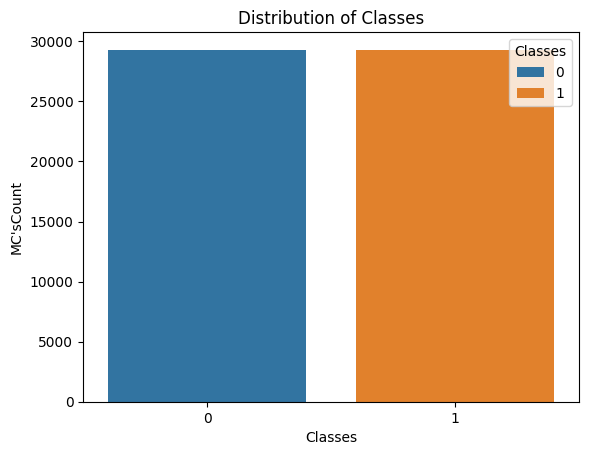

In [ ]:
encoder=LabelEncoder()
binary_class=encoder.fit_transform(data["Class"])

data['Classes']=binary_class

# Showing the distribution of the begnign and the malignant classes
sns.countplot(x='Classes', hue='Classes', data=data)
plt.xlabel('Classes')
plt.ylabel('MC\'sCount')
plt.title('Distribution of Classes')
plt.show()

## Fitting of the model for binary classification

In [ ]:
logistic_reg=LogisticRegression(max_iter=10000)
support_vector=SVC(probability=True)
random_forest=RandomForestClassifier(max_depth=15, n_estimators=200,
        min_samples_split=10, max_leaf_nodes=None,
        random_state=12, max_features=18)

In [ ]:
# Splitting of the data


X_train,X_val, y_train,y_val=train_test_split(extracted_data,binary_class, train_size=0.7, test_size=0.3)



In [ ]:
print_memory_usage()
print('before model training')
start = process_time()
logistic_reg.fit(X_train,y_train)
print_memory_usage()
print('after training')

end = process_time()
print(f'the total time is {end-start}second')


Memory Usage: 137.77 MB
before model training
Memory Usage: 146.45 MB
after training
the total time is 4.09375second


In [ ]:
print_memory_usage()
print('before model training')
start = process_time()
support_vector.fit(X_train,y_train)
print('after training')
print_memory_usage()

end = process_time()
print(f'the total time is {end-start}second')

Memory Usage: 146.46 MB
before model training
after training
Memory Usage: 148.04 MB
the total time is 38.546875second


In [ ]:
print_memory_usage()
print('before model training')
start = process_time()
random_forest.fit(X_train,y_train)
print('after training')
print_memory_usage()
end = process_time()
print(f'the total time is {end-start}second')

Memory Usage: 148.07 MB
before model training
after training
Memory Usage: 147.88 MB
the total time is 10.34375second


In [ ]:
classifiers=[logistic_reg,support_vector,random_forest]

In [ ]:


def classification_report_visualisation(classifiers,X_data_set,y_data_set):
  for classifier in classifiers:
     y_preds=classifier.predict(X_data_set)
     print(type(classifier).__name__)
     print(classification_report(y_data_set,y_preds))
     print()

classification_report_visualisation(classifiers,X_val,y_val)

LogisticRegression
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      8792
           1       0.99      0.99      0.99      8787

    accuracy                           0.99     17579
   macro avg       0.99      0.99      0.99     17579
weighted avg       0.99      0.99      0.99     17579


SVC
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      8792
           1       0.96      0.99      0.98      8787

    accuracy                           0.98     17579
   macro avg       0.98      0.98      0.98     17579
weighted avg       0.98      0.98      0.98     17579


RandomForestClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8792
           1       1.00      1.00      1.00      8787

    accuracy                           1.00     17579
   macro avg       1.00      1.00      1.00     17579
weighted avg       1.00   

LogisticRegression


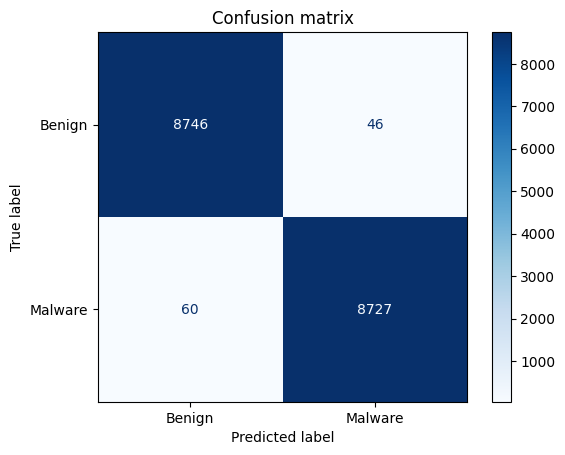

SVC


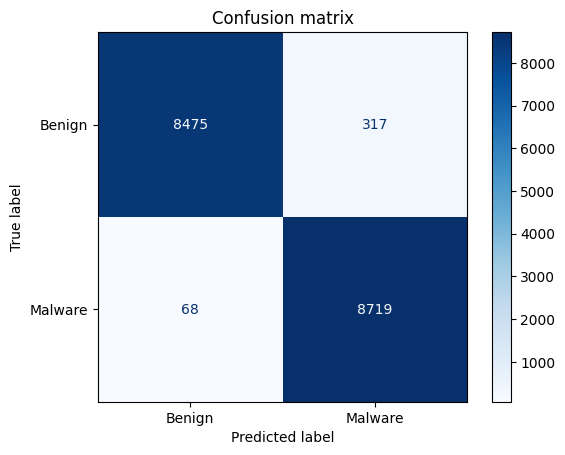

RandomForestClassifier


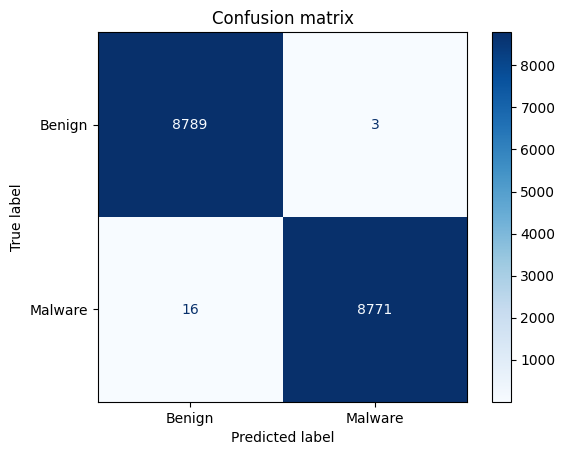

In [ ]:
def plot_confusion_matrix(y_true, y_pred, classes, title='Confusion matrix'):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(title)
    plt.show()

for classifier in classifiers:
    y_pred=classifier.predict(X_val)
    classes = ['Benign', 'Malware']
    print(type(classifier).__name__)
    plot_confusion_matrix(y_val,y_pred,classes, title='Confusion matrix')

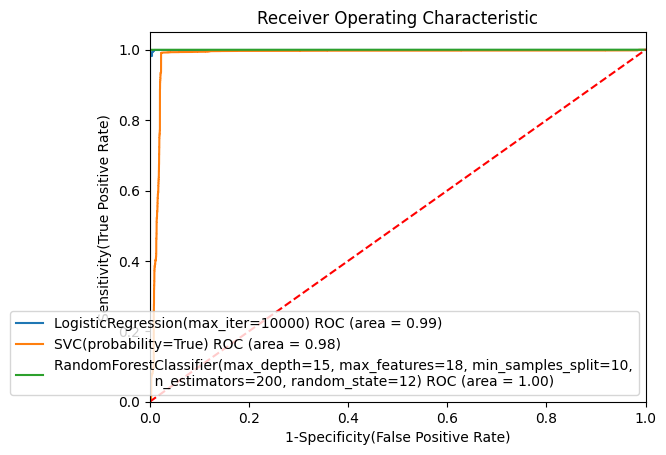

In [ ]:
def roc_auc_visualisation(classifiers,X_data_set,y_data_set):
  for classifier in classifiers:
      y_pred=classifier.predict(X_data_set) # predict the test data
  # Compute False postive rate, and True positive rate
      fpr, tpr, thresholds =roc_curve(y_data_set, classifier.predict_proba(X_data_set)[:,1])
  # Calculate Area under the curve to display on the plot
      auc =roc_auc_score(y_data_set,classifier.predict(X_data_set))
  # Now, plot the computed values
      plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (classifier, auc))
  # Custom settings for the plot
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('1-Specificity(False Positive Rate)')
  plt.ylabel('Sensitivity(True Positive Rate)')
  plt.title('Receiver Operating Characteristic')
  plt.legend(loc="lower right")
  plt.show()   # Display

roc_auc_visualisation(classifiers,X_val,y_val)

In [ ]:
min_max_scaler=MinMaxScaler()

# Scaling the features with min max scaler
scaled_X_train=min_max_scaler.fit_transform(X_train)
scaled_X_val=min_max_scaler.fit_transform(X_val)

# feating the scaled features
logistic_reg.fit(scaled_X_train,y_train)
support_vector.fit(scaled_X_train,y_train)



SVC(probability=True)

LogisticRegression
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      8792
           1       1.00      0.99      0.99      8787

    accuracy                           0.99     17579
   macro avg       0.99      0.99      0.99     17579
weighted avg       0.99      0.99      0.99     17579


SVC
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      8792
           1       1.00      0.95      0.97      8787

    accuracy                           0.97     17579
   macro avg       0.97      0.97      0.97     17579
weighted avg       0.97      0.97      0.97     17579




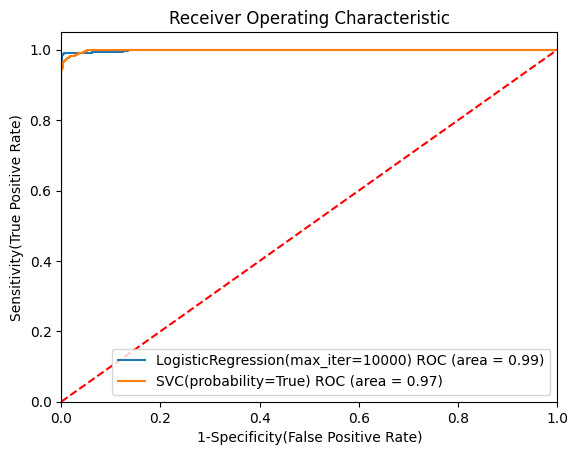

LogisticRegression


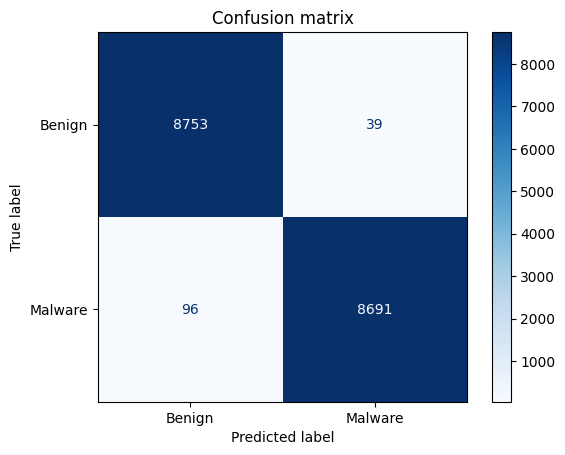

SVC


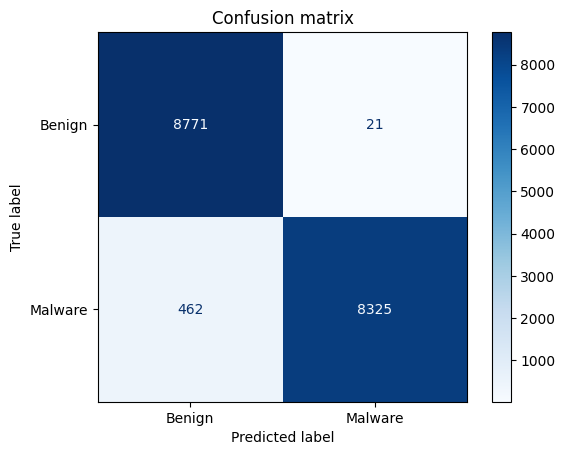

In [ ]:
scaled_classifier=[logistic_reg,support_vector]


classification_report_visualisation(scaled_classifier,scaled_X_val,y_val)
roc_auc_visualisation(scaled_classifier,scaled_X_val,y_val)

for classifier in scaled_classifier:
    y_pred=classifier.predict(scaled_X_val)
    classes = ['Benign', 'Malware']
    print(type(classifier).__name__)
    plot_confusion_matrix(y_val,y_pred,classes, title='Confusion matrix')

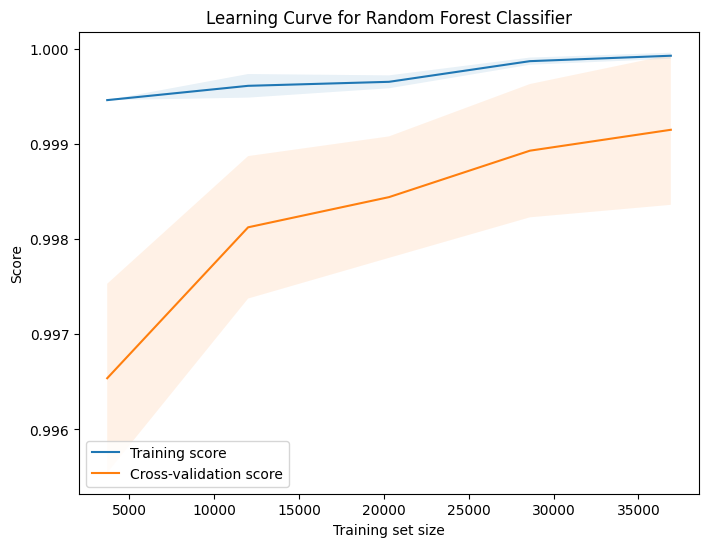

In [ ]:
# Ploting the learning curve of the model.

from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    random_forest, X_train, y_train, cv=10, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 5), random_state=42
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, valid_scores_mean, label='Cross-validation score')
plt.fill_between(train_sizes,
                  train_scores_mean - train_scores_std,
                  train_scores_mean + train_scores_std, alpha=0.1)
plt.fill_between(train_sizes,
                  valid_scores_mean - valid_scores_std,
                  valid_scores_mean + valid_scores_std, alpha=0.1)
plt.xlabel('Training set size')
plt.ylabel('Score')
plt.title('Learning Curve for Random Forest Classifier')
plt.legend()
plt.show()

In [ ]:
#function to plot the learning curve for an estimator to detect overfitting

def learning_curve_fun(estimator, X, y, cv=5, scoring ='neg_log_loss', title='title'):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv,
        train_sizes=np.linspace(0.1, 1.0, 5), #5 linearly spaced intervals between 10% and 100% of the full training data
        scoring=scoring)
    #Calculate the mean and standard deviation of the training and cross validation scores
    #the mean is calculated by taking the negative of the train_scores and test_scores because of the neg_log_loss metric used by
    #negating and converting it to positive log loss values
    train_scores_mean = -np.mean(train_scores, axis=1)
    test_scores_mean =-np.mean(test_scores, axis=1)

    #Standard deviations of the training and cross validation scores
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_std =np.std(test_scores, axis=1)

    #Creates a new figure for plotting
    plt.figure()
    plt.title(title)

    plt.xlabel("Training examples")
    plt.ylabel("Loss")

    # plt.grid()
    #The function plt.fill_between to create shaded areas around the training and cross-validation lines, which represent the variability
    #(one standard deviation from the mean) in the losses.
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean - train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

    #plots the mean training and cross-validation losses against the number of training examples, with markers and lines
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training loss")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation loss")
    #Adds a legend to the plot in the best location determined by matplotlib
    plt.legend(loc="best")
    #Display the plot
    plt.show()


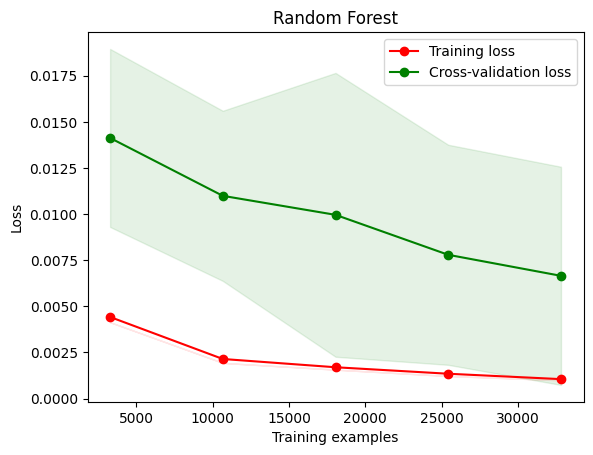

In [ ]:
learning_curve_fun(random_forest,X_train,y_train,cv=5, scoring ='neg_log_loss', title='Random Forest')

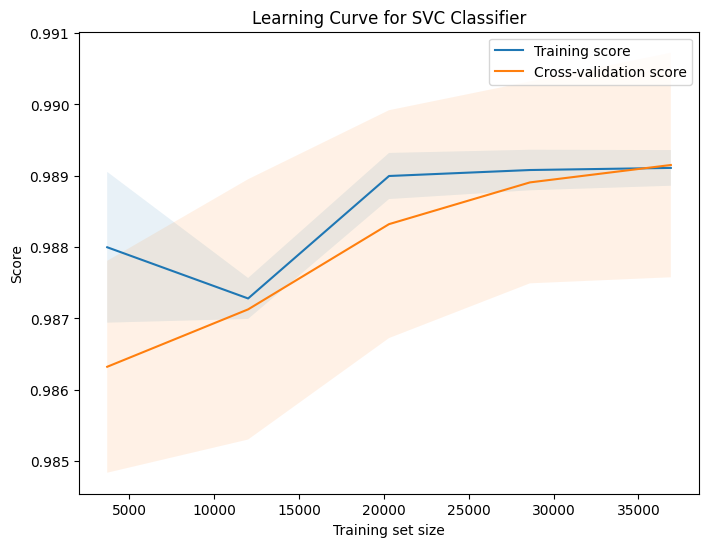

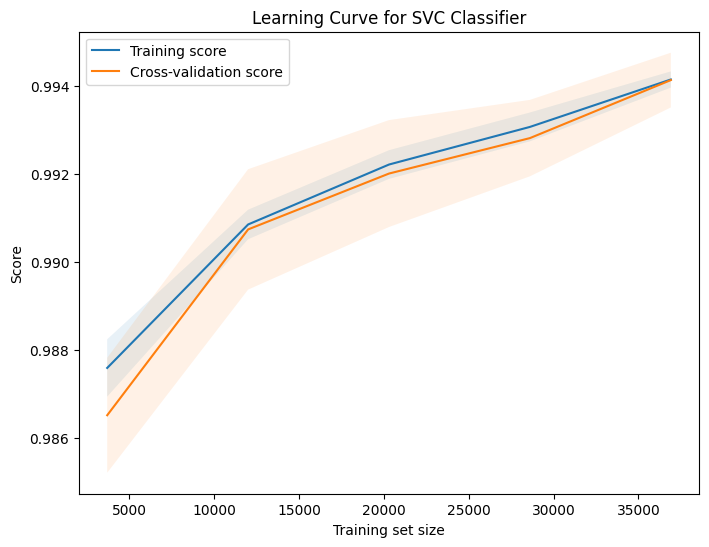

In [ ]:
# Ploting the learning curve of the model.

from sklearn.model_selection import learning_curve
for model in scaled_classifier:
    train_sizes, train_scores, valid_scores = learning_curve(
        model, scaled_X_train, y_train, cv=10, scoring='accuracy',
        train_sizes=np.linspace(0.1, 1.0, 5), random_state=42
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    valid_scores_mean = np.mean(valid_scores, axis=1)
    valid_scores_std = np.std(valid_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_scores_mean, label='Training score')
    plt.plot(train_sizes, valid_scores_mean, label='Cross-validation score')
    plt.fill_between(train_sizes,
                      train_scores_mean - train_scores_std,
                      train_scores_mean + train_scores_std, alpha=0.1)
    plt.fill_between(train_sizes,
                      valid_scores_mean - valid_scores_std,
                      valid_scores_mean + valid_scores_std, alpha=0.1)
    plt.xlabel('Training set size')
    plt.ylabel('Score')
    plt.title(f'Learning Curve for {type(classifier).__name__} Classifier')
    plt.legend()
    plt.show()

## Multi class level prediction

In [ ]:

#Multi class prediction level prediction
refined_data = data.loc[data["Category"] != 'Benign']
Category = refined_data.iloc[:, 1]

for item in Category:
        if item != 'Benign' or item != 'Ransomware' or item != 'Spyware' or item!= 'Trojan':
            splitItem = item.split('-')
            refinedItem = splitItem[0]
            data['Category'] =data['Category'].replace([item], refinedItem)
        newCategory = data.iloc[:, 1]

multi_label =data['Category']



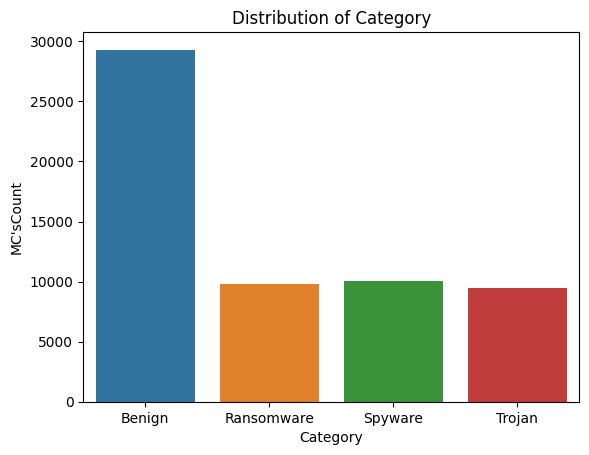

In [ ]:
#

# Showing the distribution of the categories
sns.countplot(x='Category', hue='Category', data=data)
plt.xlabel('Category')
plt.ylabel('MC\'sCount')
plt.title('Distribution of Category')
plt.show()

In [ ]:
#  Encoding the Category for classification
encoder=LabelEncoder()
multi_class=encoder.fit_transform(multi_label)

data['Category']=multi_class
print(np.unique(multi_class))


[0 1 2 3]


In [ ]:
print(np.unique(encoder.inverse_transform(multi_class)))

['Benign' 'Ransomware' 'Spyware' 'Trojan']


In [ ]:
# Splitting of the data

multi_class_extracted_data=feature_selection(data)


X_train,X_val, y_train,y_val=train_test_split(multi_class_extracted_data,multi_class, train_size=0.7, test_size=0.3)




In [ ]:
print_memory_usage()
print('before model training')
start = process_time()
random_forest_m = OneVsRestClassifier(RandomForestClassifier(max_depth=25, n_estimators=800, min_samples_split=10, random_state=12))
random_forest_m.fit(X_train, y_train)
print_memory_usage()
print('after training')

end = process_time()
print(f'the total time is {end-start}second')

Memory Usage: 309.17 MB
before model training
Memory Usage: 854.29 MB
after training
the total time is 87.6875second


In [ ]:
print_memory_usage()
print('before model training')
start = process_time()
support_vect_m= OneVsRestClassifier(SVC(kernel='rbf'))
support_vect_m.fit(X_train,y_train)
print_memory_usage()
print('after training')

end = process_time()
print(f'the total time is {end-start}second')

Memory Usage: 846.14 MB
before model training
Memory Usage: 790.00 MB
after training
the total time is 89.171875second


In [ ]:
print_memory_usage()
print('before model training')
start = process_time()
logistic_reg_m= OneVsRestClassifier(LogisticRegression(max_iter=100000))
logistic_reg_m.fit(X_train,y_train)
print_memory_usage()
print('after training')

end = process_time()
print(f'the total time is {end-start}second')

Memory Usage: 788.12 MB
before model training


c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sci

Memory Usage: 811.37 MB
after training
the total time is 30.296875second


c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
m_classifiers=[support_vect_m,logistic_reg_m]

y_pred = random_forest_m.predict(X_val)
error = zero_one_loss(y_val, y_pred)
print('Random Forest')
print("Error: ", error)
print(classification_report(y_val, y_pred))

for model in m_classifiers:
    y_pred = model.predict(X_val)
    error = zero_one_loss(y_val, y_pred)
    print(type(model).__name__)
    print("Error: ", error)
    print(classification_report(y_val, y_pred))

Random Forest
Error:  0.14164628249616018
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8837
           1       0.70      0.70      0.70      2974
           2       0.75      0.74      0.74      2929
           3       0.70      0.71      0.70      2839

    accuracy                           0.86     17579
   macro avg       0.79      0.79      0.79     17579
weighted avg       0.86      0.86      0.86     17579

OneVsRestClassifier
Error:  0.344900164969566
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      8837
           1       0.64      0.04      0.08      2974
           2       0.35      0.72      0.47      2929
           3       0.39      0.24      0.29      2839

    accuracy                           0.66     17579
   macro avg       0.57      0.49      0.44     17579
weighted avg       0.68      0.66      0.61     17579

OneVsRestClassifier
Error:  0.286705728425

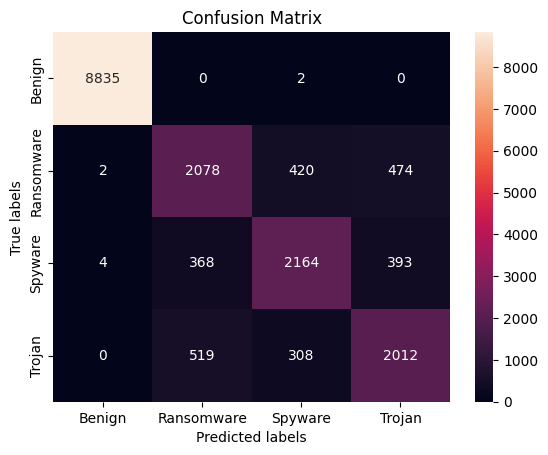

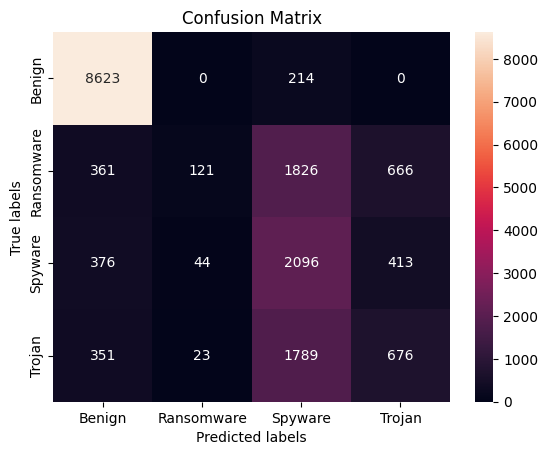

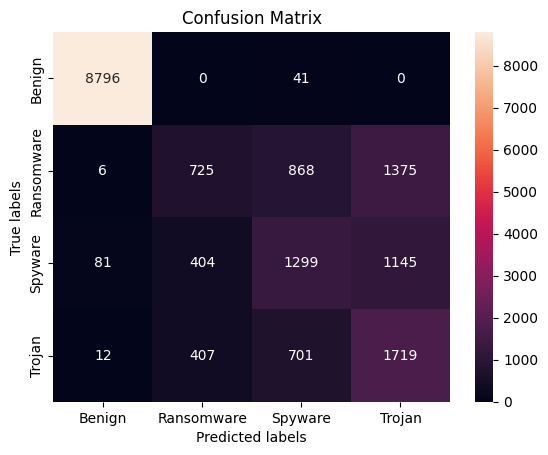

In [ ]:

y_pred = random_forest_m.predict(X_val)
matrixLables = ['Benign','Ransomware', 'Spyware', 'Trojan']
ax = plt.subplot()
cm = confusion_matrix(np.asarray(y_val), np.asarray(y_pred))
sns.heatmap(cm, annot=True, fmt='g', ax=ax);
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(matrixLables); ax.yaxis.set_ticklabels(matrixLables);
plt.show()


for model in m_classifiers:
    y_pred = model.predict(X_val)
    matrixLables = ['Benign','Ransomware', 'Spyware', 'Trojan']
    ax = plt.subplot()
    cm = confusion_matrix(np.asarray(y_val), np.asarray(y_pred))
    sns.heatmap(cm, annot=True, fmt='g', ax=ax);
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
    ax.set_title('Confusion Matrix');
    ax.xaxis.set_ticklabels(matrixLables); ax.yaxis.set_ticklabels(matrixLables);
    plt.show()



### Based on the perfomance on the binary class and the multiclass, we decided to choose random forest which performed best

In [ ]:
# Saving the model
import joblib
filename = 'finalized_rf_model.sav'
joblib.dump(random_forest_m, filename)

['finalized_rf_model.sav']

In [ ]:
import random
from time import sleep
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

data1=pd.read_csv('files/file1.csv')
data2=pd.read_csv('files/file2.csv')
data3=pd.read_csv('files/file3.csv')
data4=pd.read_csv('files/infectedfile.csv')

test_data=[data1,data2,data3,data4]

# This code was taken from https://github.com/AliElneklawy/Malware-Detection-from-Memory-Dump/blob/main/make_predictions.py

subtype_dict = {0: 'Benign', 1: 'Ransomware', 2: 'Spyware', 3: 'Trojan'}

rf = joblib.load('finalized_rf_model.sav')

for data in test_data:
    extracted_data=feature_selection(data)
    random_index = random.randint(0, len(extracted_data) - 1)
    random_sample = extracted_data.iloc[random_index, :]

    prediction = rf.predict([random_sample])
    prediction_proba = rf.predict_proba([random_sample])
    if prediction[0]== 1 or prediction[0]== 2 or prediction[0]== 3:
        attack_type = subtype_dict[prediction[0]]
        certainity = np.max(prediction_proba[0] * 100)
        print()
        print('\x1b[31mMALWARE DETECTED')
        print(f'Expected malware type: {attack_type}')
        print(f'Certainity: {certainity}%\x1b[0m')
        print()
    else:
        print('\033[92mAll Safe\033[0m')
    sleep(2)

All Safe
All Safe

MALWARE DETECTED
Expected malware type: Trojan
Certainity: 32.18118730490284%

All Safe
